# Working with Dates and Times in Python
Run the hidden code cell below to import the data used in this course.

In [21]:
# Importing the course packages
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime, timezone, timedelta
from dateutil import tz
import pickle

# Import the course datasets
rides = pd.read_csv('datasets/capital-onebike.csv')
with open('datasets/florida_hurricane_dates.pkl', 'rb') as f:
    florida_hurricane_dates = pickle.load(f)
florida_hurricane_dates = sorted(florida_hurricane_dates)

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- Count how many hurricanes made landfall each year in Florida using `florida_hurricane_dates`.
- Reload the dataset `datasets/capital-onebike.csv` so that it correctly parses date and time columns.
- Calculate the average trip duration of bike rentals on weekends in `rides`. Compare it with the average trip duration of bike rentals on weekdays.

# Dates and Calenders

In [1]:
# Import date from datetime
from datetime import date

# Create a date object for August 24, 1992.
hurricane_andrew = date(1992, 8, 24)

# Which day of the week is the date?
print(hurricane_andrew.weekday())

0


## How many hurricanes come early?

In [5]:
# Counter for how many before June 1
early_hurricanes = 0

# We loop over the dates
for hurricane in florida_hurricane_dates:
  # Check if the month is before June (month number 6)
  if hurricane.month < 6:
    early_hurricanes = early_hurricanes + 1
    
print(early_hurricanes)

10


## Math with date

In [2]:
# Import date
from datetime import date

# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)

## Counting events per calendar month

In [3]:
# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0,
		  				 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Loop over all hurricanes
for hurricane in florida_hurricane_dates:
  # Pull out the month
  month = hurricane.month
  # Increment the count in your dictionary by one
  hurricanes_each_month[month] += 1
  
print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


## Date Formats

In [4]:
# Assign the earliest date to first_date
first_date = min(florida_hurricane_dates)

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
us = "Our earliest hurricane date: " + first_date.strftime("%m/%d/%Y")

print("ISO: " + iso)
print("US: " + us)

ISO: Our earliest hurricane date: 1950-08-31
US: Our earliest hurricane date: 08/31/1950


# Combining Date and Time

In [5]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 10, 1, 15, 26, 26)

# Print the results in ISO 8601 format
print(dt.isoformat())

2017-10-01T15:26:26


In [6]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 12, 31, 15, 19, 13)

# Replace the year with 1917
dt_old = dt.replace(year=1917)

# Print the results in ISO 8601 format
print(dt_old)

1917-12-31 15:19:13


## Turning strings into datetimes

In [7]:
# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD HH:MM:SS format
s = '2017-02-03 00:00:01'

# Write a format string to parse s
fmt = '%Y-%m-%d %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2017-02-03 00:00:01


## Unix timestamps

In [10]:
# Import datetime
from datetime import datetime

# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 20, 19, 13), datetime.datetime(2017, 12, 30, 20, 9, 3)]


# Time Zones and Daylight Saving

## Creating timezone aware datetimes

In [1]:
# Import datetime, timezone
from datetime import datetime, timezone

# October 1, 2017 at 15:26:26, UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=timezone.utc)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+00:00


In [2]:
# Import datetime, timedelta, timezone
from datetime import datetime, timedelta, timezone

# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

# October 1, 2017 at 15:26:26, UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26-08:00


In [3]:
# Import datetime, timedelta, timezone
from datetime import datetime, timedelta, timezone

# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours = 11))

# October 1, 2017 at 15:26:26, UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+11:00


## Timezone Database

In [10]:
# Import tz
from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

print(et)

tzfile('/usr/share/zoneinfo/America/New_York')


In [11]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

# What if we move to UTC?
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc))\
      .total_seconds()/(60*60))

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0
5.0


# Dates and Time in pandas

## Loading datetimes with parse_dates

In [28]:
# Import pandas
import pandas as pd

# Load CSV into the rides variable
rides = pd.read_csv('datasets/capital-onebike.csv', 
                    parse_dates = ["Start date","End date"])

# Print the initial (0th) row
print(rides.iloc[0])

Start date                        2017-10-01 15:23:25
End date                          2017-10-01 15:26:26
Start station number                            31038
Start station                    Glebe Rd & 11th St N
End station number                              31036
End station             George Mason Dr & Wilson Blvd
Bike number                                    W20529
Member type                                    Member
Name: 0, dtype: object


## Making timedelta column

In [2]:
# Subtract the start date from the end date
ride_durations = rides["End date"] - rides["Start date"]

# Convert the results to seconds
rides["Duration"] =ride_durations.dt.total_seconds()

print(rides['Duration'].head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64


## Summarizing datetime in python

In [3]:
# Create joyrides
joyrides = (rides["Start station"] == rides["End station"])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


## .resample()

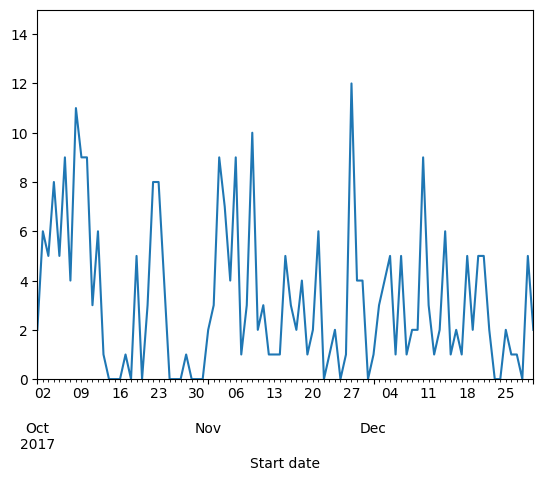

Start date
2017-10-01    2
2017-10-02    6
2017-10-03    5
2017-10-04    8
2017-10-05    5
             ..
2017-12-26    1
2017-12-27    1
2017-12-28    0
2017-12-29    5
2017-12-30    2
Freq: D, Length: 91, dtype: int64


In [4]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
rides.resample("D", on = 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

print(rides.resample("D", on = 'Start date')\
  .size())

<AxesSubplot: xlabel='Start date'>

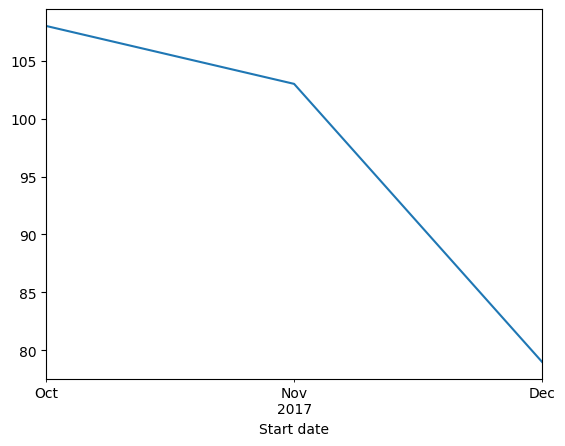

In [8]:
#resample based on Month on Start date column and plot it
rides.resample("M",on="Start date").size().plot()

## Members vs casual riders over time

In [10]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample("M",on="Start date")['Member type']

print(monthly_rides.value_counts())
print(monthly_rides.size())

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         83
            Casual         25
2017-11-30  Member         85
            Casual         18
2017-12-31  Member         68
            Casual         11
Name: Member type, dtype: int64
Start date
2017-10-31    108
2017-11-30    103
2017-12-31     79
Freq: M, Name: Member type, dtype: int64
Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


## Combining groupby() and resample()

In [12]:
#groupby "Member type" and resample based on Month on "Start Date"
grouped = rides.groupby("Member type").resample("M",on="Start date")

#median for "Duration" on grouped 
median_grouped = grouped["Duration"].median()

print(median_grouped)

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


## Timezones in pandas

In [ ]:
# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize("America/New_York")

# Print first value
print(rides['Start date'].iloc[0])

AmbiguousTimeError: Cannot infer dst time from 2017-11-05 01:56:50, try using the 'ambiguous' argument

In [14]:
"""AmbiguousTimeError: Cannot infer dst time from 2017-11-05 01:56:50, try using the 'ambiguous' argument"""

#Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize("America/New_York",ambiguous = "NaT")

# Print first value
print(rides['Start date'].iloc[0])

2017-10-01 15:23:25-04:00


In [15]:
# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert("Europe/London")

# Print the new value
print(rides['Start date'].iloc[0])

2017-10-01 20:23:25+01:00


## How long per weekday?

In [16]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.day_name()

# Print the median trip time per weekday
print(rides.groupby("Ride start weekday")['Duration'].median())

Ride start weekday
Friday       684.0
Monday       922.5
Saturday     610.0
Sunday       625.0
Thursday     659.0
Tuesday      644.0
Wednesday    629.0
Name: Duration, dtype: float64


## How long between rides?

In [31]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides["End date"].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

#time between rides in seconds
print(rides["Time since"])

0          NaN
1        991.0
2      46031.0
3       8032.0
4      32745.0
        ...   
285     6399.0
286     1480.0
287    18883.0
288    61970.0
289     4470.0
Name: Time since, Length: 290, dtype: float64


In [30]:
# Resample to the month
monthly = rides.resample("M",on="Start date")

#mean time between rides in seconds
print(monthly["Time since"].mean())

Start date
2017-10-31    19869.271028
2017-11-30    26123.194175
2017-12-31    33128.569620
Freq: M, Name: Time since, dtype: float64


In [32]:
# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31    5.519242
2017-11-30    7.256443
2017-12-31    9.202380
Freq: M, Name: Time since, dtype: float64


# Recap

![image](image.png)


![image-2](image-2.png)


![image-4](image-4.png)


![image-5](image-5.png)
